In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('../raw_data/00/sorted_feature_matrix.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sorted_feature_matrix.csv to sorted_feature_matrix.csv


In [4]:
import pandas as pd
df = pd.read_csv('sorted_feature_matrix.csv')
df

,Unnamed: 0,Date,Dividend,Volume,stock_price,fed_funds_rate,GDP,Tickers,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,pos_ma,neu_ma,neg_ma
0,69,2018-01-31,0.00,5.315047e+06,51.919825,1.41,4500.182000,AAL,-134.253165,0.807713,-0.941772,0.484585,0.476713,1.930838,0.285655,5.198588e-01,1.944860e-01
1,138,2018-01-31,0.00,1.795523e+08,40.275178,1.41,4500.182000,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.222114,6.974815e-01,8.040471e-02
2,207,2018-01-31,0.71,7.794467e+06,87.747239,1.41,4500.182000,ABBV,-23.651147,1.818001,-0.940431,1.083967,0.657965,1.027436,0.351660,3.990092e-01,2.493303e-01
3,276,2018-01-31,0.28,7.860137e+06,54.655791,1.41,4500.182000,ABT,1.333073,0.319962,0.018336,1.128287,0.829424,0.837345,0.323488,5.800269e-01,9.648529e-02
4,345,2018-01-31,0.00,1.614810e+06,29.889667,1.41,4500.182000,ACGL,2.331811,0.564373,0.024308,0.679544,0.278000,0.000000,0.000003,1.541489e-05,9.999820e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32909,34017,2023-09-30,0.00,2.114983e+06,133.590376,5.08,5105.025000,YUM,-1.693220,1.487544,-0.049550,0.721587,0.427386,0.938914,0.008204,4.912204e-01,5.005759e-01
32910,34086,2023-09-30,0.00,1.614090e+06,135.349948,5.08,5105.025000,ZBH,0.720673,1.004794,0.016942,0.945561,0.834571,0.230908,0.499998,5.000007e-01,1.404991e-06
32911,34155,2023-09-30,0.00,3.709700e+05,274.414666,5.08,5053.623333,ZBRA,1.491979,2.802807,0.048128,0.502260,0.854987,0.732639,0.999969,2.603792e-05,5.176677e-06
32912,34224,2023-09-30,0.00,5.042810e+06,28.125514,5.08,5105.025000,ZION,15.511452,1.181283,0.033125,0.458553,0.388889,-17.000000,1.000000,2.596820e-07,6.590589e-08


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
data = df.copy()

data

,Unnamed: 0,Date,Dividend,Volume,stock_price,fed_funds_rate,GDP,Tickers,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,pos_ma,neu_ma,neg_ma
0,69,2018-01-31,0.00,5.315047e+06,51.919825,1.41,4500.182000,AAL,-134.253165,0.807713,-0.941772,0.484585,0.476713,1.930838,0.285655,5.198588e-01,1.944860e-01
1,138,2018-01-31,0.00,1.795523e+08,40.275178,1.41,4500.182000,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.222114,6.974815e-01,8.040471e-02
2,207,2018-01-31,0.71,7.794467e+06,87.747239,1.41,4500.182000,ABBV,-23.651147,1.818001,-0.940431,1.083967,0.657965,1.027436,0.351660,3.990092e-01,2.493303e-01
3,276,2018-01-31,0.28,7.860137e+06,54.655791,1.41,4500.182000,ABT,1.333073,0.319962,0.018336,1.128287,0.829424,0.837345,0.323488,5.800269e-01,9.648529e-02
4,345,2018-01-31,0.00,1.614810e+06,29.889667,1.41,4500.182000,ACGL,2.331811,0.564373,0.024308,0.679544,0.278000,0.000000,0.000003,1.541489e-05,9.999820e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32909,34017,2023-09-30,0.00,2.114983e+06,133.590376,5.08,5105.025000,YUM,-1.693220,1.487544,-0.049550,0.721587,0.427386,0.938914,0.008204,4.912204e-01,5.005759e-01
32910,34086,2023-09-30,0.00,1.614090e+06,135.349948,5.08,5105.025000,ZBH,0.720673,1.004794,0.016942,0.945561,0.834571,0.230908,0.499998,5.000007e-01,1.404991e-06
32911,34155,2023-09-30,0.00,3.709700e+05,274.414666,5.08,5053.623333,ZBRA,1.491979,2.802807,0.048128,0.502260,0.854987,0.732639,0.999969,2.603792e-05,5.176677e-06
32912,34224,2023-09-30,0.00,5.042810e+06,28.125514,5.08,5105.025000,ZION,15.511452,1.181283,0.033125,0.458553,0.388889,-17.000000,1.000000,2.596820e-07,6.590589e-08


In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'Dividend', 'Volume', 'stock_price',
       'fed_funds_rate', 'GDP', 'Tickers', 'debt_to_equity', 'EPS',
       'return_on_equity', 'quick ratio', 'operating_ratio',
       'inventory_turnover', 'pos_ma', 'neu_ma', 'neg_ma'],
      dtype='object')

In [55]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [56]:
data

,Date,Dividend,Volume,stock_price,fed_funds_rate,GDP,Tickers,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,pos_ma,neu_ma,neg_ma
0,2018-01-31,0.00,5.315047e+06,51.919825,1.41,4500.182000,AAL,-134.253165,0.807713,-0.941772,0.484585,0.476713,1.930838,0.285655,5.198588e-01,1.944860e-01
1,2018-01-31,0.00,1.795523e+08,40.275178,1.41,4500.182000,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.222114,6.974815e-01,8.040471e-02
2,2018-01-31,0.71,7.794467e+06,87.747239,1.41,4500.182000,ABBV,-23.651147,1.818001,-0.940431,1.083967,0.657965,1.027436,0.351660,3.990092e-01,2.493303e-01
3,2018-01-31,0.28,7.860137e+06,54.655791,1.41,4500.182000,ABT,1.333073,0.319962,0.018336,1.128287,0.829424,0.837345,0.323488,5.800269e-01,9.648529e-02
4,2018-01-31,0.00,1.614810e+06,29.889667,1.41,4500.182000,ACGL,2.331811,0.564373,0.024308,0.679544,0.278000,0.000000,0.000003,1.541489e-05,9.999820e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32909,2023-09-30,0.00,2.114983e+06,133.590376,5.08,5105.025000,YUM,-1.693220,1.487544,-0.049550,0.721587,0.427386,0.938914,0.008204,4.912204e-01,5.005759e-01
32910,2023-09-30,0.00,1.614090e+06,135.349948,5.08,5105.025000,ZBH,0.720673,1.004794,0.016942,0.945561,0.834571,0.230908,0.499998,5.000007e-01,1.404991e-06
32911,2023-09-30,0.00,3.709700e+05,274.414666,5.08,5053.623333,ZBRA,1.491979,2.802807,0.048128,0.502260,0.854987,0.732639,0.999969,2.603792e-05,5.176677e-06
32912,2023-09-30,0.00,5.042810e+06,28.125514,5.08,5105.025000,ZION,15.511452,1.181283,0.033125,0.458553,0.388889,-17.000000,1.000000,2.596820e-07,6.590589e-08


In [79]:
aapl_rows = df[df['Tickers'] == 'AAPL']
aapl_rows.shape

(69, 17)

In [60]:
aapl_rows.columns

Index(['Unnamed: 0', 'Date', 'Dividend', 'Volume', 'stock_price',
       'fed_funds_rate', 'GDP', 'Tickers', 'debt_to_equity', 'EPS',
       'return_on_equity', 'quick ratio', 'operating_ratio',
       'inventory_turnover', 'pos_ma', 'neu_ma', 'neg_ma'],
      dtype='object')

In [75]:
x_columns = ['Dividend', 'Volume',
       'fed_funds_rate', 'GDP', 'debt_to_equity', 'EPS',
       'return_on_equity', 'quick ratio', 'operating_ratio',
       'inventory_turnover', 'pos_ma', 'neu_ma', 'neg_ma']
y_column = ['stock_price']

In [76]:
lookback=12

def create_dataset(dataset, lookback, x_columns, y_column):
    X, Y = [], []
    for i in range(len(dataset) - lookback - 1):
        x_sequence = dataset.iloc[i:(i + lookback)][x_columns].values
        y_value = dataset.iloc[i + lookback][y_column]
        X.append(x_sequence)
        Y.append(y_value)
    return np.array(X), np.array(Y)


In [86]:
train_size = int(len(aapl_rows) * 0.8)
train = aapl_rows[:train_size]
test = aapl_rows[train_size:]


In [87]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train.select_dtypes(include='float'))
test_scaled = scaler.transform(test.select_dtypes(include='float'))

X_train, y_train = create_dataset(train, lookback, x_columns, y_column)
X_test, y_test = create_dataset(test, lookback, x_columns, y_column)

In [88]:
from tensorflow.keras import models, layers, regularizers

reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)

model = models.Sequential()
# model.add(layers.Embedding(max_features, embedding_dim, input_length=max_len))
model.add(layers.LSTM(units=75, return_sequences=True,
                      input_shape = (X_train.shape[1], X_train.shape[2])))
# Repeat output sequence
# model.add(layers.RepeatVector(3))
model.add(layers.LSTM(32, activation='relu', dropout=0.2, kernel_regularizer=reg_l2, return_sequences=True))
# model.add(layers.TimeDistributed(layers.Dense(32, activation='relu')))
# model.add(layers.Dense(20, activation='relu'))
# model.add(layers.Dense(1, activation='softmax'))
model.add(layers.GRU(64, activation='relu', dropout=0.2, kernel_regularizer=reg_l2, return_sequences=True))
model.add(layers.GRU(32, activation='relu', dropout=0.1, kernel_regularizer=reg_l2, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(1, activation='softmax')))

model.compile(optimizer='adam',
              loss='mse')

model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 12, 75)            26700     
                                                                 
 lstm_33 (LSTM)              (None, 12, 32)            13824     
                                                                 
 gru_20 (GRU)                (None, 12, 64)            18816     
                                                                 
 gru_21 (GRU)                (None, 12, 32)            9408      
                                                                 
 time_distributed_18 (TimeD  (None, 12, 1)             33        
 istributed)                                                     
                                                                 
Total params: 68781 (268.68 KB)
Trainable params: 68781 (268.68 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

es=EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    epochs=300,
    batch_size=4,
    callbacks=[es],
    verbose=1)

Epoch 1/300
8/8 [==============================] - 0s 38ms/step - loss: 7371.4746 - val_loss: 23111.6562
Epoch 2/300
8/8 [==============================] - 0s 33ms/step - loss: 7371.4917 - val_loss: 23111.6738
Epoch 3/300
8/8 [==============================] - 0s 31ms/step - loss: 7371.5039 - val_loss: 23111.6797
Epoch 4/300
8/8 [==============================] - 0s 33ms/step - loss: 7371.5103 - val_loss: 23111.6855
Epoch 5/300
8/8 [==============================] - 0s 36ms/step - loss: 7371.5161 - val_loss: 23111.6973
Epoch 6/300
8/8 [==============================] - 0s 32ms/step - loss: 7371.5283 - val_loss: 23111.7109
Epoch 7/300
8/8 [==============================] - 0s 32ms/step - loss: 7371.5522 - val_loss: 23111.7480
Epoch 8/300
8/8 [==============================] - 0s 33ms/step - loss: 7371.5957 - val_loss: 23111.8047
Epoch 9/300
8/8 [==============================] - 0s 34ms/step - loss: 7371.6675 - val_loss: 23111.9043
Epoch 10/300
8/8 [==============================] - 0s 

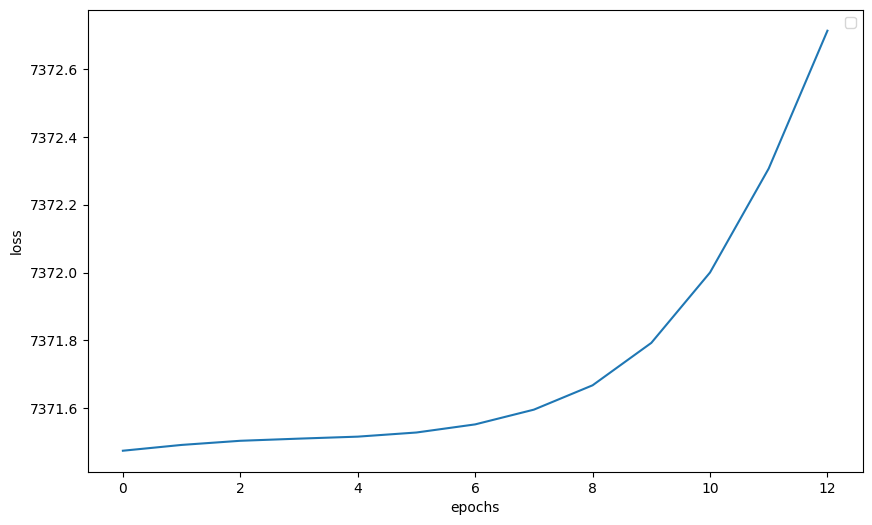

In [94]:
# Diagnostic plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()